In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# **Data Visualization**

In [2]:
df = pd.read_csv('final_condo_data.csv')
df.head(10)

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Furnishing,Rating,...,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,furnishing_label,price_per_sqm,amenities_count,size_category,occupancy_demand
0,101398,106,5,3,1,1,1,1,Fully Furnished,4.3,...,1,1,1,1,1,2,956.584906,9,3,1
1,92131,48,4,2,1,1,1,1,Fully Furnished,4.5,...,1,1,1,1,1,2,1919.395833,9,1,2
2,42191,38,1,1,1,1,0,1,Semi Furnished,4.3,...,1,0,1,1,1,1,1110.289474,7,1,2
3,81355,40,5,1,1,1,1,1,Fully Furnished,4.4,...,1,1,1,1,1,2,2033.875000,9,1,2
4,13066,28,0,1,1,1,0,1,Unfurnished,4.3,...,0,1,0,1,0,0,466.642857,5,0,2
5,87820,52,5,2,1,1,1,1,Fully Furnished,4.3,...,1,1,1,1,1,2,1688.846154,9,2,1
6,127250,110,6,2,1,1,1,1,Fully Furnished,4.6,...,1,1,1,1,1,2,1156.818182,9,3,1
7,18506,30,1,1,1,1,0,0,Unfurnished,4.3,...,0,0,0,0,1,0,616.866667,3,1,2
8,35073,31,2,2,1,1,0,1,Semi Furnished,4.3,...,1,1,0,1,1,1,1131.387097,7,1,2
9,145568,52,5,2,1,1,1,1,Fully Furnished,4.3,...,1,1,1,1,1,2,2799.384615,9,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2999 non-null   int64  
 1   Square Area         2999 non-null   int64  
 2   Bedrooms            2999 non-null   int64  
 3   Bathrooms           2999 non-null   int64  
 4   Security            2999 non-null   int64  
 5   Airconditioning     2999 non-null   int64  
 6   Parking             2999 non-null   int64  
 7   Balcony             2999 non-null   int64  
 8   Furnishing          2999 non-null   object 
 9   Rating              2999 non-null   float64
 10  ReviewsCount        2999 non-null   float64
 11  Swimming pool       2999 non-null   int64  
 12  Multi-Purpose Hall  2999 non-null   int64  
 13  Function Rooms      2999 non-null   int64  
 14  Gym                 2999 non-null   int64  
 15  Study Hall          2999 non-null   int64  
 16  furnis

In [4]:
mean_imputer = SimpleImputer(strategy='mean')
df['Rating'] = mean_imputer.fit_transform(df[['Rating']])
df['Rating'] = df['Rating'].round(1)

median_imputer = SimpleImputer(strategy='median')
df['ReviewsCount'] = median_imputer.fit_transform(df[['ReviewsCount']])

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2999 non-null   int64  
 1   Square Area         2999 non-null   int64  
 2   Bedrooms            2999 non-null   int64  
 3   Bathrooms           2999 non-null   int64  
 4   Security            2999 non-null   int64  
 5   Airconditioning     2999 non-null   int64  
 6   Parking             2999 non-null   int64  
 7   Balcony             2999 non-null   int64  
 8   Furnishing          2999 non-null   object 
 9   Rating              2999 non-null   float64
 10  ReviewsCount        2999 non-null   float64
 11  Swimming pool       2999 non-null   int64  
 12  Multi-Purpose Hall  2999 non-null   int64  
 13  Function Rooms      2999 non-null   int64  
 14  Gym                 2999 non-null   int64  
 15  Study Hall          2999 non-null   int64  
 16  furnis

## **Scatter Plot**

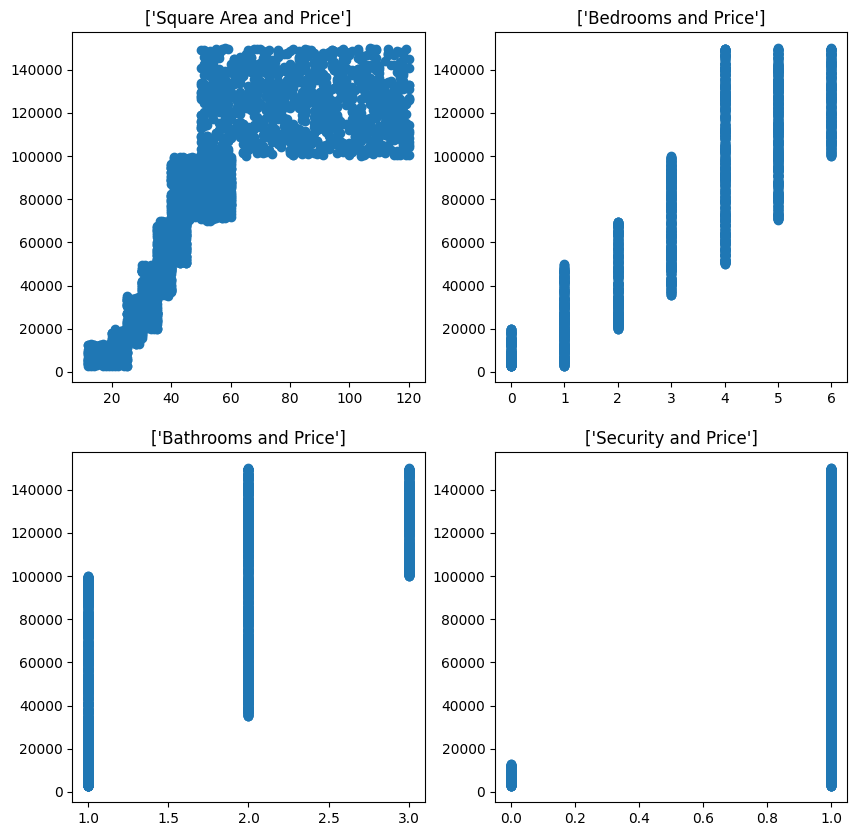

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Square Area"], df["Price"])
ax[0, 1].scatter(df["Bedrooms"], df["Price"])
ax[1, 0].scatter(df["Bathrooms"], df["Price"])
ax[1, 1].scatter(df["Security"], df["Price"])

ax[0, 0].set_title(["Square Area and Price"])
ax[0, 1].set_title(["Bedrooms and Price"])
ax[1, 0].set_title(["Bathrooms and Price"])
ax[1, 1].set_title(["Security and Price"])

plt.show()

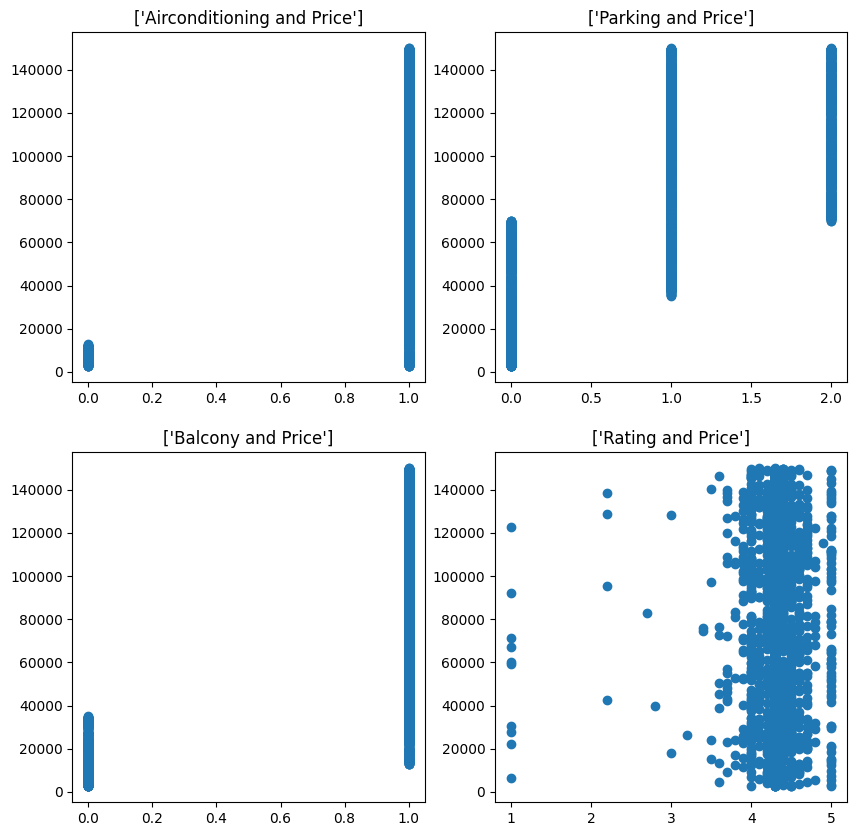

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Airconditioning"], df["Price"])
ax[0, 1].scatter(df["Parking"], df["Price"])
ax[1, 0].scatter(df["Balcony"], df["Price"])
ax[1, 1].scatter(df["Rating"], df["Price"])

ax[0, 0].set_title(["Airconditioning and Price"])
ax[0, 1].set_title(["Parking and Price"])
ax[1, 0].set_title(["Balcony and Price"])
ax[1, 1].set_title(["Rating and Price"])

plt.show()

Text(0.5, 1.0, "['Function Rooms and Price']")

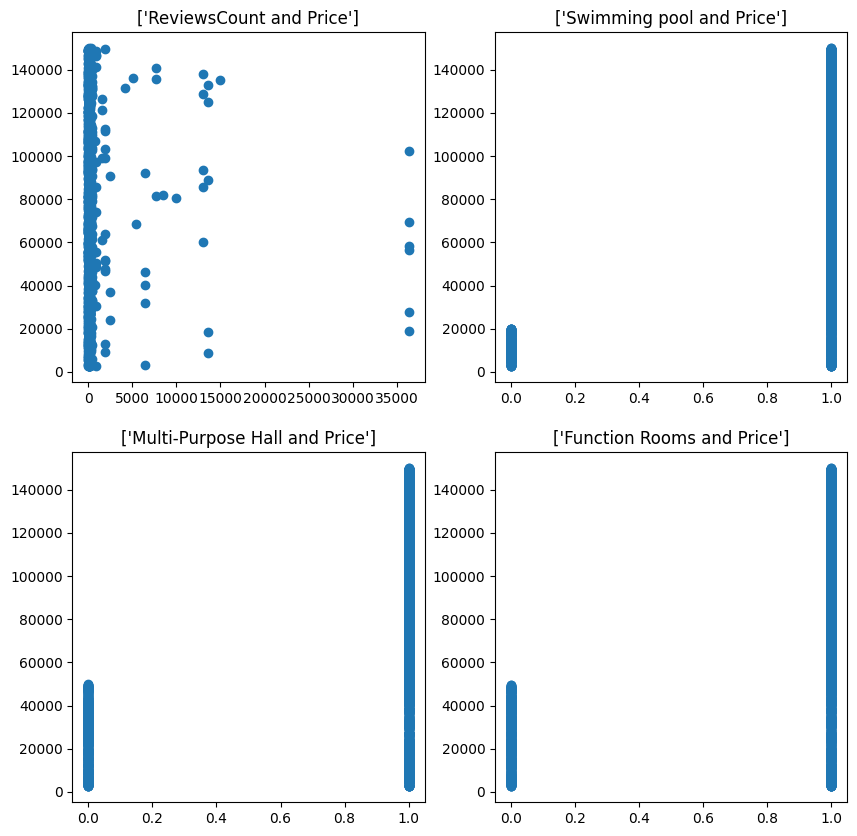

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["ReviewsCount"], df["Price"])
ax[0, 1].scatter(df["Swimming pool"], df["Price"])
ax[1, 0].scatter(df["Multi-Purpose Hall"], df["Price"])
ax[1, 1].scatter(df["Function Rooms"], df["Price"])

ax[0, 0].set_title(["ReviewsCount and Price"])
ax[0, 1].set_title(["Swimming pool and Price"])
ax[1, 0].set_title(["Multi-Purpose Hall and Price"])
ax[1, 1].set_title(["Function Rooms and Price"])

Text(0.5, 1.0, "['price_per_sqm and Price']")

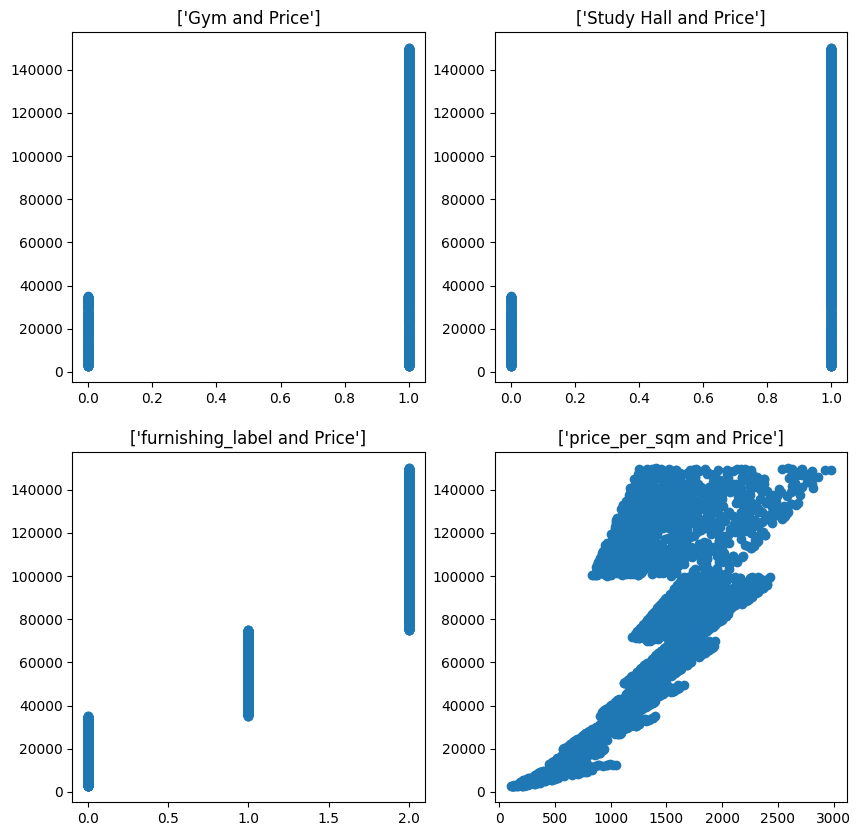

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Gym"], df["Price"])
ax[0, 1].scatter(df["Study Hall"], df["Price"])
ax[1, 0].scatter(df["furnishing_label"], df["Price"])
ax[1, 1].scatter(df["price_per_sqm"], df["Price"])

ax[0, 0].set_title(["Gym and Price"])
ax[0, 1].set_title(["Study Hall and Price"])
ax[1, 0].set_title(["furnishing_label and Price"])
ax[1, 1].set_title(["price_per_sqm and Price"])

Text(0.5, 1.0, "['occupancy_demand and Price']")

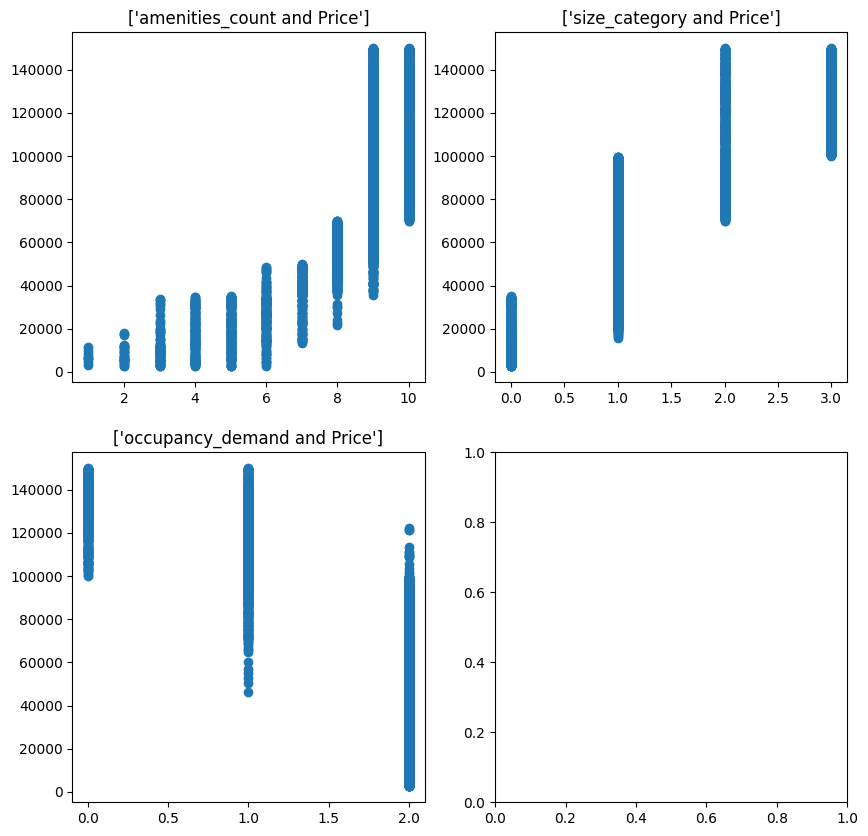

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["amenities_count"], df["Price"])
ax[0, 1].scatter(df["size_category"], df["Price"])
ax[1, 0].scatter(df["occupancy_demand"], df["Price"])

ax[0, 0].set_title(["amenities_count and Price"])
ax[0, 1].set_title(["size_category and Price"])
ax[1, 0].set_title(["occupancy_demand and Price"])

## **Correlation Matrix**

In [11]:
# sns.set_palette('colorblind')
# sns.pairplot(data=df, height=2)

In [12]:
correlation = df.corr(numeric_only=True)
correlation

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,furnishing_label,price_per_sqm,amenities_count,size_category,occupancy_demand
Price,1.000000,0.840161,0.870431,0.728747,0.312710,0.313422,0.737041,0.586573,0.008037,-0.008091,0.398604,0.507342,0.521076,0.464382,0.469274,0.910991,0.674314,0.802365,0.885046,-0.794736
Square Area,0.840161,1.000000,0.752723,0.694206,0.249650,0.254696,0.613592,0.458340,0.012538,-0.004363,0.309647,0.399273,0.404346,0.355900,0.358541,0.745909,0.215155,0.639969,0.934207,-0.787538
Bedrooms,0.870431,0.752723,1.000000,0.641406,0.313986,0.310895,0.703750,0.580237,0.017817,-0.009439,0.422460,0.499458,0.520948,0.456840,0.457236,0.849491,0.608906,0.787151,0.807435,-0.665962
Bathrooms,0.728747,0.694206,0.641406,1.000000,0.190781,0.191704,0.498354,0.405233,0.026849,-0.021982,0.257955,0.331961,0.341863,0.341592,0.346379,0.641481,0.370810,0.543646,0.713753,-0.659871
Security,0.312710,0.249650,0.313986,0.190781,1.000000,0.483829,0.229564,0.470794,-0.008539,-0.003259,0.407509,0.147911,0.130906,0.190661,0.198491,0.309012,0.362791,0.456176,0.288527,-0.146177
Airconditioning,0.313422,0.254696,0.310895,0.191704,0.483829,1.000000,0.230674,0.473070,-0.000849,0.010239,0.353797,0.211108,0.095456,0.148504,0.208478,0.310506,0.355032,0.450759,0.289923,-0.146884
Parking,0.737041,0.613592,0.703750,0.498354,0.229564,0.230674,1.000000,0.487611,-0.002797,0.005321,0.310394,0.427019,0.441890,0.411033,0.416794,0.786885,0.541051,0.814693,0.670410,-0.493697
Balcony,0.586573,0.458340,0.580237,0.405233,0.470794,0.473070,0.487611,1.000000,0.003923,0.003175,0.511453,0.368585,0.352125,0.499598,0.493726,0.656364,0.599200,0.775649,0.535455,-0.310490
Rating,0.008037,0.012538,0.017817,0.026849,-0.008539,-0.000849,-0.002797,0.003923,1.000000,0.064465,-0.005505,0.031059,-0.010669,0.006872,-0.003030,0.013567,-0.005299,0.002217,0.006227,0.053966
ReviewsCount,-0.008091,-0.004363,-0.009439,-0.021982,-0.003259,0.010239,0.005321,0.003175,0.064465,1.000000,-0.002173,0.008833,-0.005765,-0.007730,-0.031644,-0.010231,0.000438,-0.002513,-0.016395,0.026586


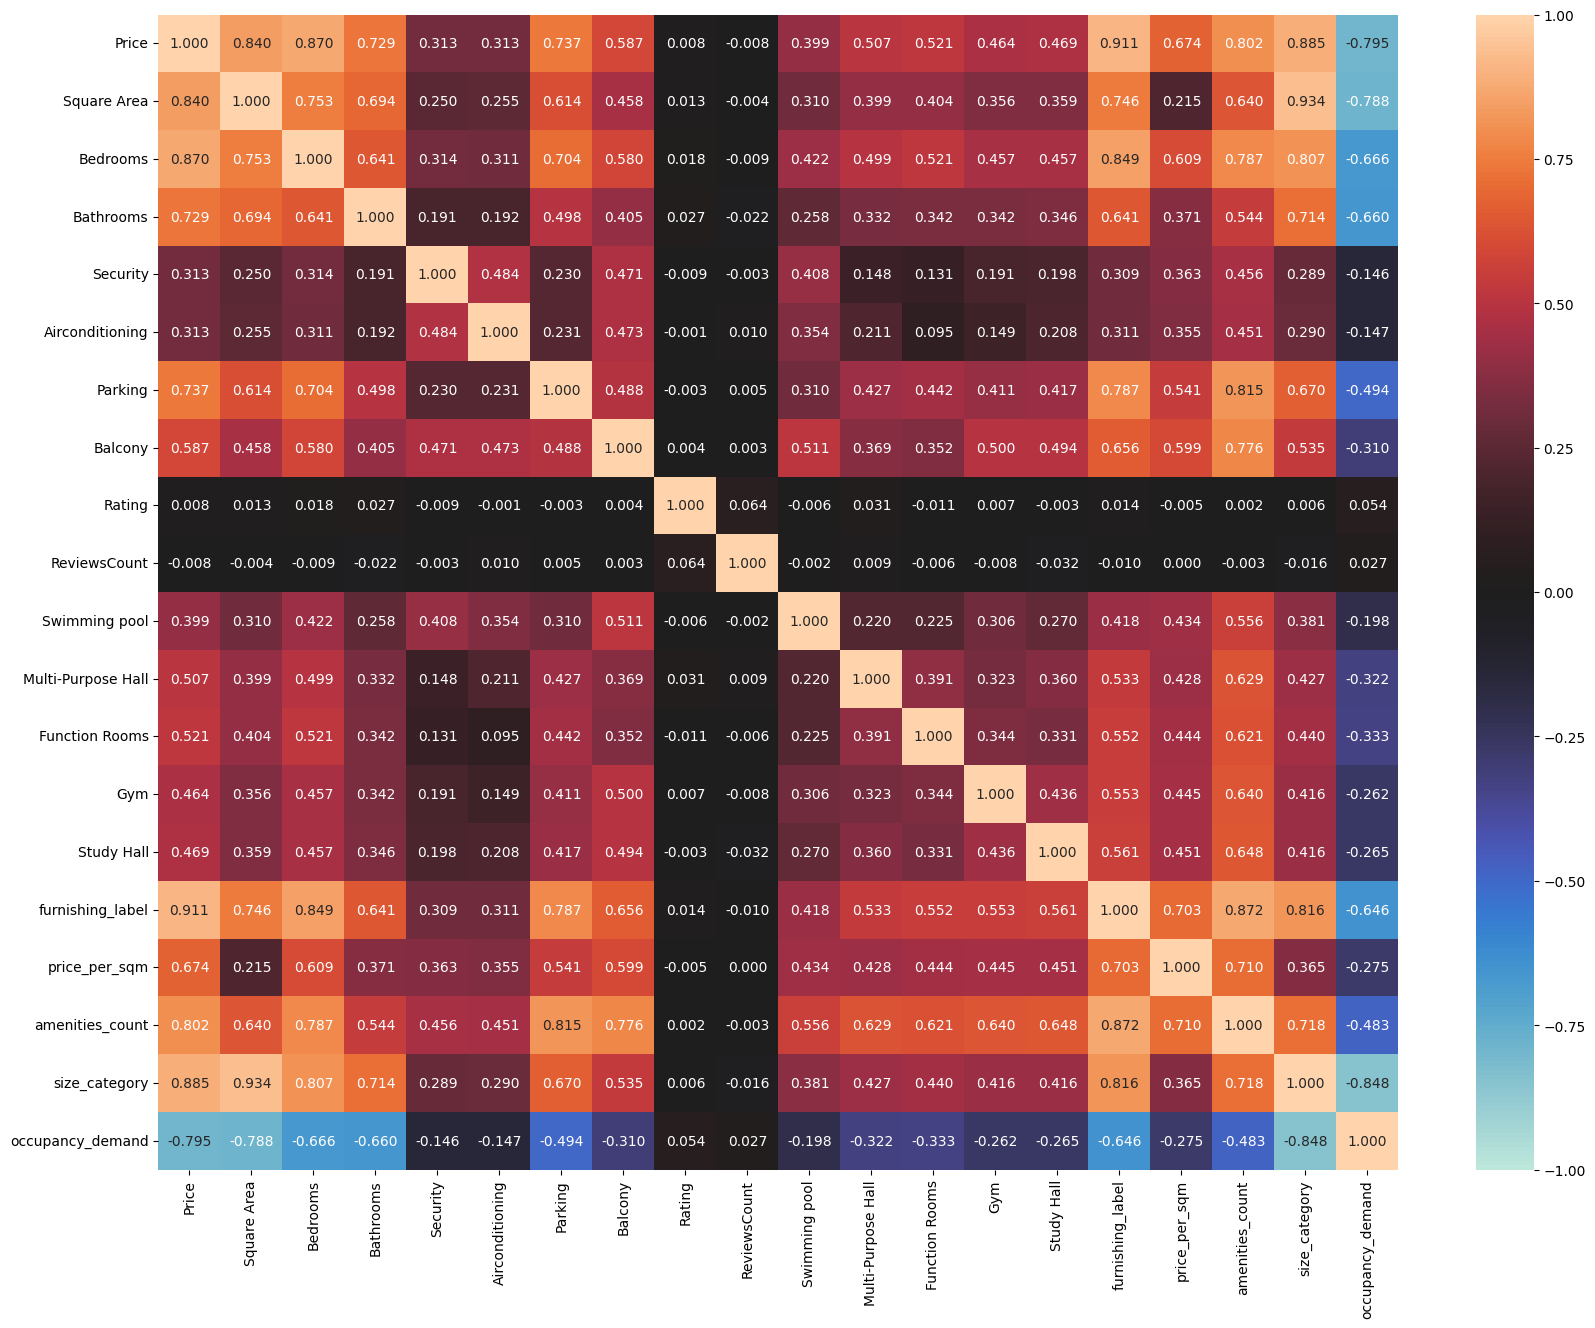

In [13]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0, fmt=".3f")
plt.show()

## **Calculating p-value and r-squared**

In [14]:
independent_variables = ['Square Area',
                         'Bedrooms',
                         'Bathrooms',
                         'Security',
                         'Airconditioning',
                         'Parking',
                         'Balcony',
                         'Rating',
                         'ReviewsCount',
                         'Swimming pool',
                         'Multi-Purpose Hall',
                         'Function Rooms',
                         'Gym',
                         'Study Hall',
                         'furnishing_label',
                         'price_per_sqm',
                         'amenities_count',
                         'size_category',
                         'occupancy_demand']

results_list = []

for col in independent_variables:
    result = pearsonr(df[col], df["Price"])
    results_list.append({
        "Independent Variable": col,
        "Correlation Coefficient": result[0],
        "R-squared": result[0]**2,
        "P-value": result[1]
    })

results_df = pd.DataFrame(results_list)
display(results_df)

,Independent Variable,Correlation Coefficient,R-squared,P-value
0,Square Area,0.840161,0.705871,0.000000e+00
1,Bedrooms,0.870431,0.757650,0.000000e+00
2,Bathrooms,0.728747,0.531072,0.000000e+00
3,Security,0.312710,0.097788,4.981462e-69
4,Airconditioning,0.313422,0.098233,2.370494e-69
5,Parking,0.737041,0.543230,0.000000e+00
6,Balcony,0.586573,0.344068,9.083694e-277
7,Rating,0.008037,0.000065,6.599890e-01
8,ReviewsCount,-0.008091,0.000065,6.578298e-01
9,Swimming pool,0.398604,0.158885,9.079536e-115


# **Model Training**
### Multiple Linear Regression

## **Model 1**
### All Features

In [19]:
x = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Security',
        'Airconditioning',
        'Parking',
        'Balcony',
        'Rating',
        'ReviewsCount',
        'Swimming pool',
        'Multi-Purpose Hall',
        'Function Rooms',
        'Gym',
        'Study Hall',
        'furnishing_label',
        'price_per_sqm',
        'amenities_count',
        'size_category',
        'occupancy_demand']]
x = sm.add_constant(x)
y = df['Price']

In [20]:
mlr_model = LinearRegression()

mlr_model.fit(x, y)

y_pred = mlr_model.predict(x)
print('Intercept: ', mlr_model.intercept_)
print('Coefficient: ', mlr_model.coef_)

Intercept:  -9495.584640977337
Coefficient:  [ 0.00000000e+00  9.39785696e+02  6.34844584e+01  1.35067513e+03
 -2.96594425e+03 -2.99051837e+03  3.81542439e+03 -2.71945544e+03
  1.90628112e+03 -3.80622913e-02 -1.57858549e+03  2.05313950e+03
  1.33612419e+03  4.58694630e+02  4.24825862e+02  8.90203344e+02
  4.46155972e+01 -2.16629497e+03 -8.81967139e+02 -1.10719349e+04]


In [21]:
oslmod = sm.OLS(y, x).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     9693.
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:43:00   Log-Likelihood:                -30100.
No. Observations:                2999   AIC:                         6.024e+04
Df Residuals:                    2980   BIC:                         6.035e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9495.5846   1804.224     -5.263      0.000    -1.3e+04   -5957.934
Square Area          939.7857     12.714     73.918      0.000     914.857     964.715
Bedrooms              63.4845    127.818      0.497      0.619    -187.135     314.104
Bathrooms           1350.6751    206.073      6.554      0.000     946.615    1754.735
Security           -2965.9443    648.999     -4.570      0.000   -4238.475   -1693.414
Airconditioning    -2990.5184    641.082     -4.665      0.000   -4247.526   -1733.511
Parking             3815.4244    214.771     17.765      0.000    3394.309    4236.540
Balcony            -2719.4554    480.844     -5.656      0.000   -3662.276   -1776.635
Rating              1906.2811    364.916      5.224      0.000    1190.768    2621.794
ReviewsCount          -0.0381      0.054     -0.699      0.484      -0.145       0.069
Swimming pool      -1578.5855    498.140     -3.169      0.002   -2555.318    -601.853
Multi-Purpose Hall  2053.1395    333.088      6.164      0.000    1400.034    2706.245
Function Rooms      1336.1242    320.331      4.171      0.000     708.032    1964.217
Gym                  458.6946    397.732      1.153      0.249    -321.163    1238.552
Study Hall           424.8259    396.911      1.070      0.285    -353.421    1203.073
furnishing_label     890.2033    412.910      2.156      0.031      80.586    1699.821
price_per_sqm         44.6156      0.453     98.422      0.000      43.727      45.504
amenities_count    -2166.2950    117.427    -18.448      0.000   -2396.540   -1936.050
size_category       -881.9671    407.372     -2.165      0.030   -1680.726     -83.208
occupancy_demand   -1.107e+04    307.458    -36.011      0.000   -1.17e+04   -1.05e+04
==============================================================================
Omnibus:                       71.581   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.167
Skew:                           0.192   Prob(JB):                     6.61e-28
Kurtosis:                       3.924   Cond. No.                     1.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
print(oslmod.rsquared)

0.9832062071581468


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1376,96698,96718.021453
932,2814,-16477.786478
144,53728,53886.083811
1752,4991,4359.358802
51,99576,90069.257708
414,110557,108284.480060
2306,143068,144586.187323
266,86419,88296.308285
2705,44016,45228.474427
2424,12143,20450.286637


In [24]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  15726168270.52203


## **Model 2**
### Excluding Rating and ReviewCounts

In [25]:
x = dfx = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Security',
        'Airconditioning',
        'Parking',
        'Balcony',
        'Rating',
        'ReviewsCount',
        'Swimming pool',
        'Multi-Purpose Hall',
        'Function Rooms',
        'Gym',
        'Study Hall',
        'furnishing_label',
        'price_per_sqm',
        'amenities_count',
        'size_category',
        'occupancy_demand']]
x = sm.add_constant(x)
y = df['Price']

In [26]:
mlr_model2 = LinearRegression()

mlr_model2.fit(x, y)

y_pred = mlr_model2.predict(x)
print('Intercept: ', mlr_model.intercept_)
print('Coefficient: ', mlr_model.coef_)

Intercept:  -9495.584640977337
Coefficient:  [ 0.00000000e+00  9.39785696e+02  6.34844584e+01  1.35067513e+03
 -2.96594425e+03 -2.99051837e+03  3.81542439e+03 -2.71945544e+03
  1.90628112e+03 -3.80622913e-02 -1.57858549e+03  2.05313950e+03
  1.33612419e+03  4.58694630e+02  4.24825862e+02  8.90203344e+02
  4.46155972e+01 -2.16629497e+03 -8.81967139e+02 -1.10719349e+04]


In [27]:
oslmod = sm.OLS(y, x).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     9693.
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:43:20   Log-Likelihood:                -30100.
No. Observations:                2999   AIC:                         6.024e+04
Df Residuals:                    2980   BIC:                         6.035e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9495.5846   1804.224     -5.263      0.000    -1.3e+04   -5957.934
Square Area          939.7857     12.714     73.918      0.000     914.857     964.715
Bedrooms              63.4845    127.818      0.497      0.619    -187.135     314.104
Bathrooms           1350.6751    206.073      6.554      0.000     946.615    1754.735
Security           -2965.9443    648.999     -4.570      0.000   -4238.475   -1693.414
Airconditioning    -2990.5184    641.082     -4.665      0.000   -4247.526   -1733.511
Parking             3815.4244    214.771     17.765      0.000    3394.309    4236.540
Balcony            -2719.4554    480.844     -5.656      0.000   -3662.276   -1776.635
Rating              1906.2811    364.916      5.224      0.000    1190.768    2621.794
ReviewsCount          -0.0381      0.054     -0.699      0.484      -0.145       0.069
Swimming pool      -1578.5855    498.140     -3.169      0.002   -2555.318    -601.853
Multi-Purpose Hall  2053.1395    333.088      6.164      0.000    1400.034    2706.245
Function Rooms      1336.1242    320.331      4.171      0.000     708.032    1964.217
Gym                  458.6946    397.732      1.153      0.249    -321.163    1238.552
Study Hall           424.8259    396.911      1.070      0.285    -353.421    1203.073
furnishing_label     890.2033    412.910      2.156      0.031      80.586    1699.821
price_per_sqm         44.6156      0.453     98.422      0.000      43.727      45.504
amenities_count    -2166.2950    117.427    -18.448      0.000   -2396.540   -1936.050
size_category       -881.9671    407.372     -2.165      0.030   -1680.726     -83.208
occupancy_demand   -1.107e+04    307.458    -36.011      0.000   -1.17e+04   -1.05e+04
==============================================================================
Omnibus:                       71.581   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.167
Skew:                           0.192   Prob(JB):                     6.61e-28
Kurtosis:                       3.924   Cond. No.                     1.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
print(oslmod.rsquared)

0.9832062071581468


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1376,96698,96718.021453
932,2814,-16477.786478
144,53728,53886.083811
1752,4991,4359.358802
51,99576,90069.257708
414,110557,108284.480060
2306,143068,144586.187323
266,86419,88296.308285
2705,44016,45228.474427
2424,12143,20450.286637


In [30]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  15726168270.52203


In [31]:
print(mlr_model2.feature_names_in_)

['const' 'Square Area' 'Bedrooms' 'Bathrooms' 'Security' 'Airconditioning'
 'Parking' 'Balcony' 'Rating' 'ReviewsCount' 'Swimming pool'
 'Multi-Purpose Hall' 'Function Rooms' 'Gym' 'Study Hall'
 'furnishing_label' 'price_per_sqm' 'amenities_count' 'size_category'
 'occupancy_demand']


## **Model 3**
### Excluding Features with <50% r-squared

In [27]:
x = df[['Square Area',
        'Bedrooms',
        'Bathrooms',
        'Parking',
        'furnishing_label',
        'price_per_sqm',
        'amenities_count',
        'size_category',
        'occupancy_demand']]
x = sm.add_constant(x)
y = df['Price']

In [28]:
mlr_model = LinearRegression()

mlr_model.fit(x, y)

y_pred = mlr_model.predict(x)
print('Intercept: ', mlr_model.intercept_)
print('Coefficient: ', mlr_model.coef_)

Intercept:  -1674.6050898116227
Coefficient:  [     0.            929.33162454    229.70979966   1519.31006551
   4398.93179826   2265.89001417     42.9669349   -2541.32278085
  -2047.48915869 -11800.86760897]


In [29]:
oslmod = sm.OLS(y, x).fit()
oslmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.781e+04
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:39:49   Log-Likelihood:                -30229.
No. Observations:                2999   AIC:                         6.048e+04
Df Residuals:                    2989   BIC:                         6.054e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1674.6051    926.981     -1.807      0.071   -3492.190     142.980
Square Area        929.3316     13.044     71.246      0.000     903.756     954.908
Bedrooms           229.7098    132.097      1.739      0.082     -29.301     488.721
Bathrooms         1519.3101    213.251      7.125      0.000    1101.177    1937.443
Parking           4398.9318    249.167     17.655      0.000    3910.376    4887.487
furnishing_label  2265.8900    405.845      5.583      0.000    1470.125    3061.655
price_per_sqm       42.9669      0.453     94.949      0.000      42.080      43.854
amenities_count  -2541.3228    134.795    -18.853      0.000   -2805.623   -2277.022
size_category    -2047.4892    412.494     -4.964      0.000   -2856.290   -1238.689
occupancy_demand  -1.18e+04    310.206    -38.042      0.000   -1.24e+04   -1.12e+04
==============================================================================
Omnibus:                       61.012   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.873
Skew:                           0.196   Prob(JB):                     1.52e-21
Kurtosis:                       3.783   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
print(oslmod.rsquared)

0.9816939348388878


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred_test = mlr_model.predict(x_test)

results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})
display(results.head(20))

,Actual Price,Predicted Price
1376,96698,96841.619128
932,2814,-14586.937688
144,53728,53615.072450
1752,4991,-2738.064574
51,99576,89340.669359
414,110557,108138.868375
2306,143068,143728.949437
266,86419,88802.104776
2705,44016,46411.308571
2424,12143,17342.141819


In [32]:
sum_of_squared_errors = str(np.sum(np.square(results['Actual Price'] - results['Predicted Price'])))
print('Residual sum of square is: ', sum_of_squared_errors)

Residual sum of square is:  17538901297.67382


# **Model Training**
### Logistic Regression

In [33]:
# Check occupancy demand distribution
print("Occupancy Demand Distribution:")
print(df['occupancy_demand'].value_counts().sort_index())
print("\nOccupancy Demand Value Counts:")
print("0 = Low Occupancy:", (df['occupancy_demand'] == 0).sum())
print("1 = Medium Occupancy:", (df['occupancy_demand'] == 1).sum())
print("2 = High Occupancy:", (df['occupancy_demand'] == 2).sum())

Occupancy Demand Distribution:
occupancy_demand
0     393
1     842
2    1764
Name: count, dtype: int64

Occupancy Demand Value Counts:
0 = Low Occupancy: 393
1 = Medium Occupancy: 842
2 = High Occupancy: 1764


## **Model 1**
### All features

Logistic Regression Model 1 - All Features:
Accuracy: 0.9633
Precision (weighted): 0.9632

Classification Report:
                      precision    recall  f1-score   support

   Low Occupancy (0)       0.91      0.93      0.92        69
Medium Occupancy (1)       0.95      0.93      0.94       182
  High Occupancy (2)       0.98      0.99      0.98       349

            accuracy                           0.96       600
           macro avg       0.95      0.95      0.95       600
        weighted avg       0.96      0.96      0.96       600



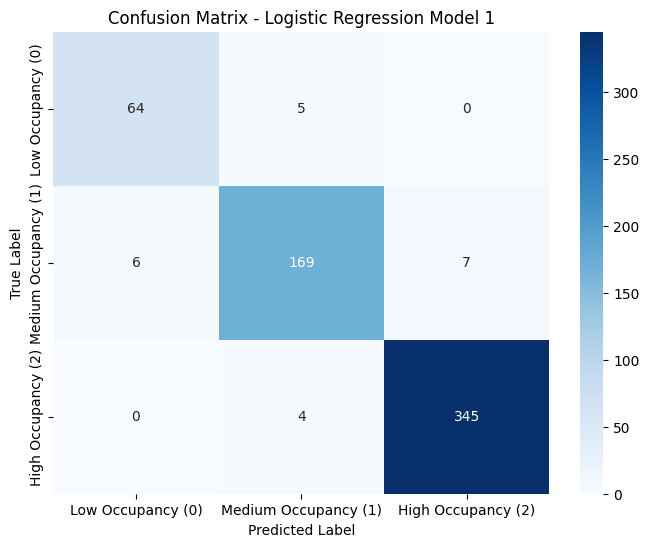

In [34]:
X_lr = df[['Square Area',
           'Bedrooms',
           'Bathrooms',
           'Security',
           'Airconditioning',
           'Parking',
           'Balcony',
           'Rating',
           'ReviewsCount',
           'Swimming pool',
           'Multi-Purpose Hall',
           'Function Rooms',
           'Gym',
           'Study Hall',
           'furnishing_label',
           'price_per_sqm',
           'amenities_count',
           'size_category',
           'Price']]

y_lr = df['occupancy_demand']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
lr_model1 = LogisticRegression(random_state=42, max_iter=1000)
lr_model1.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr1 = lr_model1.predict(X_test_scaled)

# Calculate metrics
accuracy1 = accuracy_score(y_test, y_pred_lr1)
precision1 = precision_score(y_test, y_pred_lr1, average='weighted')

print("Logistic Regression Model 1 - All Features:")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision (weighted): {precision1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr1, target_names=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'],
            yticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Model 1')
plt.show()

## **Model 2**
### Excluding Rating and ReviewsCount

Logistic Regression Model 2 - Excluding Rating and ReviewsCount:
Accuracy: 0.9700
Precision (weighted): 0.9700

Classification Report:
                      precision    recall  f1-score   support

   Low Occupancy (0)       0.93      0.96      0.94        69
Medium Occupancy (1)       0.97      0.93      0.95       182
  High Occupancy (2)       0.98      0.99      0.99       349

            accuracy                           0.97       600
           macro avg       0.96      0.96      0.96       600
        weighted avg       0.97      0.97      0.97       600



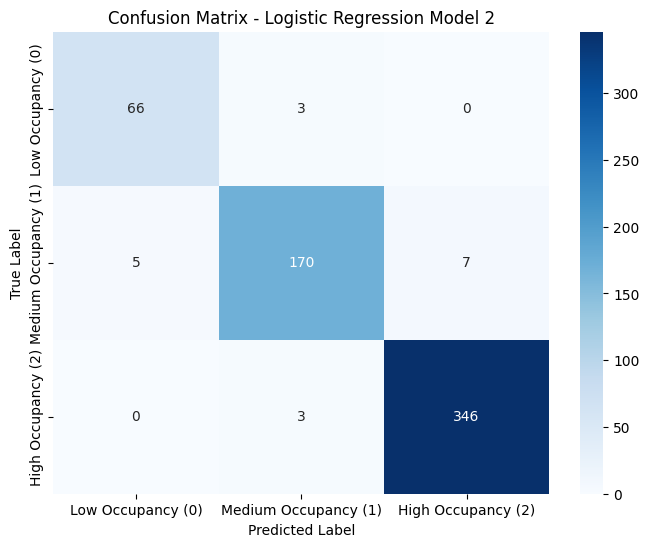

In [35]:
X_lr2 = df[['Square Area',
            'Bedrooms',
            'Bathrooms',
            'Security',
            'Airconditioning',
            'Parking',
            'Balcony',
            'Swimming pool',
            'Multi-Purpose Hall',
            'Function Rooms',
            'Gym',
            'Study Hall',
            'furnishing_label',
            'price_per_sqm',
            'amenities_count',
            'size_category',
            'Price']]

y_lr2 = df['occupancy_demand']

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_lr2, y_lr2, test_size=0.2, random_state=42)

# Scale the features
scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

# Train the logistic regression model
lr_model2 = LogisticRegression(random_state=42, max_iter=1000)
lr_model2.fit(X_train2_scaled, y_train2)

# Make predictions
y_pred_lr2 = lr_model2.predict(X_test2_scaled)

# Calculate metrics
accuracy2 = accuracy_score(y_test2, y_pred_lr2)
precision2 = precision_score(y_test2, y_pred_lr2, average='weighted')

print("Logistic Regression Model 2 - Excluding Rating and ReviewsCount:")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision (weighted): {precision2:.4f}")
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_lr2, target_names=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)']))

# Confusion matrix
conf_matrix2 = confusion_matrix(y_test2, y_pred_lr2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'],
            yticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Model 2')
plt.show()

## **Model 3**
### High Correlation Features with Occupancy Demand | Features with > 0.3 Correlation

In [36]:
occupancy_correlations = df.corr(numeric_only=True)['occupancy_demand'].sort_values(ascending=False)
print("Correlation of features with occupancy_demand:")
print(occupancy_correlations)

high_corr_features = occupancy_correlations[abs(occupancy_correlations) > 0.3].index.tolist()
high_corr_features.remove('occupancy_demand')
print("\nFeatures with correlation > 0.3:")
print(high_corr_features)

Correlation of features with occupancy_demand:
occupancy_demand      1.000000
Rating                0.053966
ReviewsCount          0.026586
Security             -0.146177
Airconditioning      -0.146884
Swimming pool        -0.197645
Gym                  -0.261728
Study Hall           -0.265396
price_per_sqm        -0.275420
Balcony              -0.310490
Multi-Purpose Hall   -0.321758
Function Rooms       -0.332969
amenities_count      -0.483002
Parking              -0.493697
furnishing_label     -0.645772
Bathrooms            -0.659871
Bedrooms             -0.665962
Square Area          -0.787538
Price                -0.794736
size_category        -0.848023
Name: occupancy_demand, dtype: float64

Features with correlation > 0.3:
['Balcony', 'Multi-Purpose Hall', 'Function Rooms', 'amenities_count', 'Parking', 'furnishing_label', 'Bathrooms', 'Bedrooms', 'Square Area', 'Price', 'size_category']


Logistic Regression Model 3 - High Correlation Features Only:
Features used: ['Balcony', 'Multi-Purpose Hall', 'Function Rooms', 'amenities_count', 'Parking', 'furnishing_label', 'Bathrooms', 'Bedrooms', 'Square Area', 'Price', 'size_category']
Accuracy: 0.9700
Precision (weighted): 0.9700

Classification Report:
                      precision    recall  f1-score   support

   Low Occupancy (0)       0.93      0.96      0.94        69
Medium Occupancy (1)       0.96      0.94      0.95       182
  High Occupancy (2)       0.98      0.99      0.99       349

            accuracy                           0.97       600
           macro avg       0.96      0.96      0.96       600
        weighted avg       0.97      0.97      0.97       600



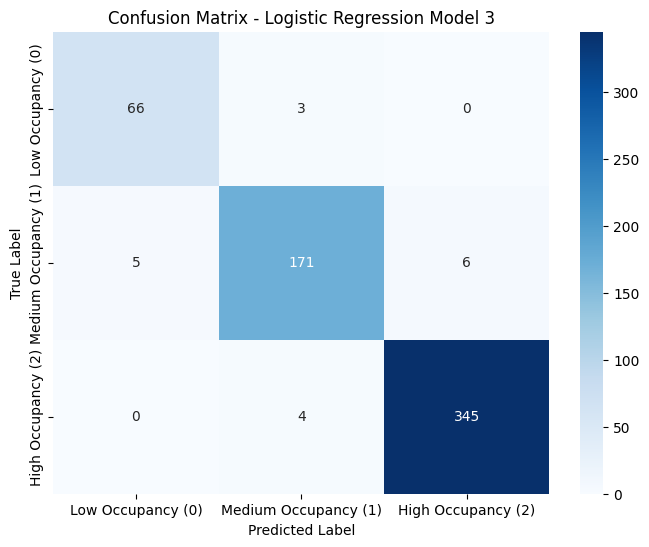

In [37]:
X_lr3 = df[high_corr_features]

y_lr3 = df['occupancy_demand']

# Split the data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_lr3, y_lr3, test_size=0.2, random_state=42)

# Scale the features
scaler3 = StandardScaler()
X_train3_scaled = scaler3.fit_transform(X_train3)
X_test3_scaled = scaler3.transform(X_test3)

# Train the logistic regression model
lr_model3 = LogisticRegression(random_state=42, max_iter=1000)
lr_model3.fit(X_train3_scaled, y_train3)

# Make predictions
y_pred_lr3 = lr_model3.predict(X_test3_scaled)

# Calculate metrics
accuracy3 = accuracy_score(y_test3, y_pred_lr3)
precision3 = precision_score(y_test3, y_pred_lr3, average='weighted')

print("Logistic Regression Model 3 - High Correlation Features Only:")
print(f"Features used: {high_corr_features}")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision (weighted): {precision3:.4f}")
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_lr3, target_names=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)']))

# Confusion matrix
conf_matrix3 = confusion_matrix(y_test3, y_pred_lr3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'],
            yticklabels=['Low Occupancy (0)', 'Medium Occupancy (1)', 'High Occupancy (2)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Model 3')
plt.show()

In [38]:
import pickle

# Save MLR Model 2
with open('mlr_model2.pkl', 'wb') as f:
    pickle.dump(mlr_model2, f)

# Save Logistic Regression Model 2
with open('lr_model2.pkl', 'wb') as f:
    pickle.dump(lr_model2, f)

print("MLR Model 2 and Logistic Regression Model 2 have been saved as 'mlr_model2.pkl' and 'lr_model2.pkl'.")

MLR Model 2 and Logistic Regression Model 2 have been saved as 'mlr_model2.pkl' and 'lr_model2.pkl'.
